This is a venture into exploring a dataset through sound.
I'll start from the base level concepts, then gradually build up, testing each new addition in turn.

First, here are some packages we'll need throughout:

In [2]:
import numpy as np
import scipy.signal as sg
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

A good anchor from which to explore could be an A440 sine wave - an 'A' pitch (as on the piano) with a frequency of 440Hz. From here we can manipulate the familiar sound and pitch according to our data.

The equation for a sine wave is given by:
y = amplitude * sin(2 * pi * frequency * time_series)

In [3]:
amplitude=0.5
fs=16000
duration=10
freq=440

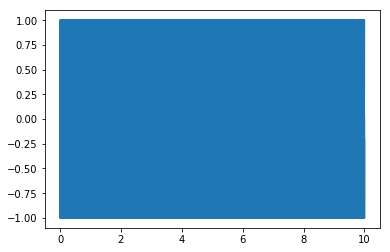

In [4]:
t = np.linspace(0, duration, fs*duration)
y = np.sin(2*np.pi*freq*t)
plt.plot(t, y)

Let's view a slice of the waveform

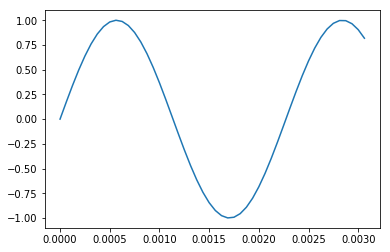

In [5]:
plt.plot(t[:50], y[:50])

This is our basis - a sine wave at 440Hz, for 10 seconds.

One method for hearing changes and features in the data is pitch. Let's start by modulating the frequency over time according to a simple linear function.

Using the same parameters as before, we can extend the original sine wave equation to modulate over time according to another function.
Here, we'll create an array of numbers increasing evenly from 0 to 1 over the length of the duration we specified before (10 seconds). The arrays need to be of equal length to apply.

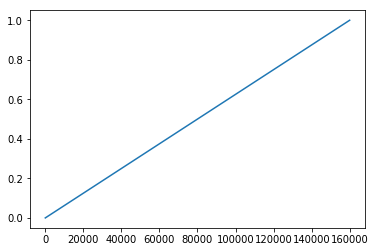

In [6]:
modulator=np.arange(0, 1, (1.0/len(t)))
plt.plot(modulator)

The expected effect here is increasing the frequency of the sine wav from 0hz to 440Hz by the end of the duration.

This only requires a simple extension to the original sine wave equation:
y = amplitude * sin(2 * pi * frequency * modulator * time_series)

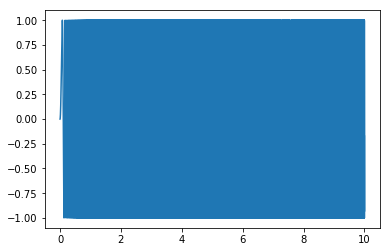

In [7]:
t = np.linspace(0, duration, fs*duration)
modulator=np.arange(0, 1, (1.0/len(t)))
ym = np.sin(2*np.pi*(freq*modulator)*t)
plt.plot(t, ym)

Again, we can zoom in for a better look.

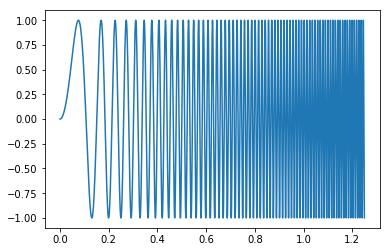

In [11]:
plt.plot(t[:20000], ym[:20000])

We now have two different signals. You can run the following commands to save them as wav files, then use afplay on the command line (or iTunes or something) to listen to them.

In [ ]:
wav.write("./a440_10sec.wav", fs, y)
wav.write("./0_to_a440_10sec.wav", fs, ym)

That's nice.

Chances are, our data isn't linear, so let's see what happens when we plot some random data and use it to manipulate the sine wave. As we saw above with our increasing line, our line should determine the pitch contour, allowing us to hear 'bumps' and any regularities in the data.

To speed things up, we can create a shorter array with defined peaks, then resample up to the correct length (which we would have to do anyway).

In [22]:
time_series=duration*fs
datapoints=[1, 2, 3, 2, 1, 0, -1, -2, 1, 0, 1, 3, 5, 6, 2, -1, -1, 4, 2, 1]
resampled_data=sg.resample(datapoints, time_series)

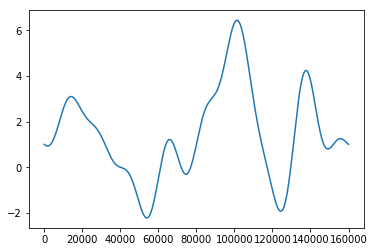

In [23]:
plt.plot(resampled_data)

We can now see the expected pitch contour, so let's modulate the original sine wave and have a listen.

In [24]:
#Parameters
amplitude=0.5
fs=16000
duration=10
freq=440
modulator=resampled_data

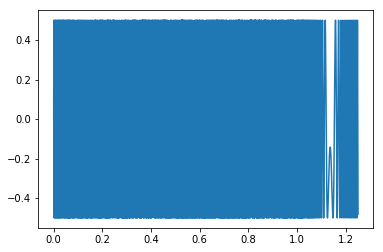

In [25]:
t = np.linspace(0, duration, fs*duration)
ym2 = amplitude*np.sin(2*np.pi*(freq*modulator)*t)
plt.plot(t[:20000], ym2[:20000])

In [26]:
wav.write("./wibbly_a440.wav", fs, ym2)

This is a work in progress. Next steps are to look into normalising the datapoints, and scaling according to a useful pitch range - possibly between an octave above and below middle C.